# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [385]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso
import seaborn as sns
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis 

In [386]:
muebles = pd.read_csv("Advertising.csv",index_col=0)
muebles.dtypes

TV          float64
radio       float64
newpaper     object
sales       float64
dtype: object

In [387]:
newspaper = []
for x in muebles["newpaper"]:
    if "s" in x:
        x = x.replace("s","")
        newspaper.append(float(x))
    else:
        newspaper.append(float(x))


In [388]:
muebles["newpaper"] = newspaper 

In [389]:
muebles.rename(columns={"newpaper":"newspaper"},inplace=True)

In [390]:
muebles

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


<Axes: >

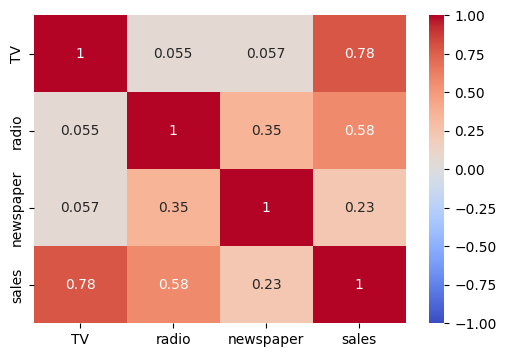

In [391]:
# Lectura datos, relación variables, mapas de correlación...
plt.figure(figsize=(6,4))
sns.heatmap(muebles.corr(),annot = True,cmap="coolwarm",vmin=-1,vmax=1)

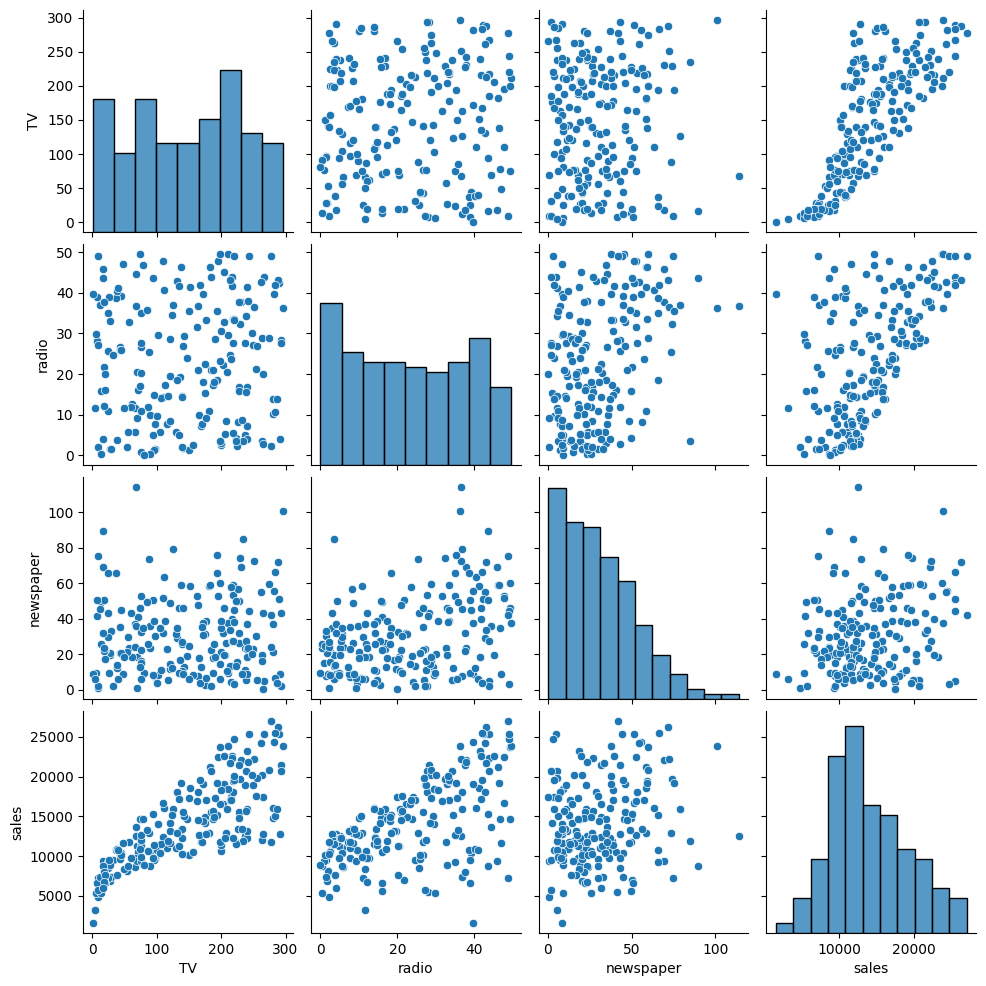

In [392]:
sns.pairplot(muebles)

In [393]:
# Utiliza todas las celdas que necesites...

In [394]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Modelado

In [395]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [396]:
#Sin newspaper sale mejor que en cualquier otra opción
X = muebles[["TV","radio"]]
y = pd.Series(muebles["sales"])

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [397]:
modelo_1 = LinearRegression()

In [398]:
modelo_1.fit(X_train,y_train)

LinearRegression()

In [399]:
print(modelo_1.coef_)
modelo_1.intercept_

[ 44.72830197 190.66726454]


np.float64(3028.2552507833043)

In [400]:
predicciones = modelo_1.predict(X_test)

In [401]:
print("R2 score test", r2_score(y_test, predicciones))
print("mean_squared_error", mean_squared_error(y_test, predicciones))
print("mean_absolute_error", mean_absolute_error(y_test, predicciones))

R2 score test 0.9005833101920356
mean_squared_error 3137948.009068354
mean_absolute_error 1444.3023138227582


In [402]:
# Utiliza todas las celdas que necesites...

GRADO 2

In [403]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [404]:
polinomio = PolynomialFeatures(degree=2)
X_train_poly2 = polinomio.fit_transform(X_train)
X_test_poly2 = polinomio.transform(X_test)
modelo_2 = LinearRegression()
modelo_2.fit(X_train_poly2,y_train)

LinearRegression()

In [405]:
predicciones2 = modelo_2.predict(X_test_poly2)

In [406]:
print("R2 score test", r2_score(y_test, predicciones2))
print("mean_squared_error", mean_squared_error(y_test, predicciones2))
print("mean_absolute_error", mean_absolute_error(y_test, predicciones2))

R2 score test 0.9884627879931582
mean_squared_error 364155.872791575
mean_absolute_error 493.4820298266892


GRADO 3

In [407]:
polinomio = PolynomialFeatures(degree=3)
X_train_poly3 = polinomio.fit_transform(X_train)
X_test_poly3 = polinomio.transform(X_test)
modelo_3 = LinearRegression()
modelo_3.fit(X_train_poly3,y_train)

LinearRegression()

In [408]:
predicciones3 = modelo_3.predict(X_test_poly3)

In [409]:
print("R2 score test", r2_score(y_test, predicciones3))
print("mean_squared_error", mean_squared_error(y_test, predicciones3))
print("mean_absolute_error", mean_absolute_error(y_test, predicciones3))

R2 score test 0.9943380835619904
mean_squared_error 178710.4302957809
mean_absolute_error 335.8526633159307


GRADO 4

In [410]:
polinomio = PolynomialFeatures(degree=4)
X_train_poly4 = polinomio.fit_transform(X_train)
X_test_poly4 = polinomio.transform(X_test)
modelo_4 = LinearRegression()
modelo_4.fit(X_train_poly4,y_train)

LinearRegression()

In [411]:
X_test_poly4.shape

(40, 15)

In [412]:
predicciones4 = modelo_4.predict(X_test_poly4)

In [413]:
print("R2 score test", r2_score(y_test, predicciones4))
print("mean_squared_error", mean_squared_error(y_test, predicciones4))
print("mean_absolute_error", mean_absolute_error(y_test, predicciones4))

R2 score test 0.9939190345581926
mean_squared_error 191937.12281299755
mean_absolute_error 356.9823087148947


El mejor resultado lo obtengo en el modelo de regresión polinómica de grado 3. Aplicaré la regularización en el de grado 3

In [414]:
ridgeR = Ridge(alpha=350)
ridgeR.fit(X_train_poly3, y_train)

Ridge(alpha=350)

In [415]:
predicciones_ridge = ridgeR.predict(X_test_poly3)

COMPARACIÓN DE MODELOS (GRADO 3 Y GRADO 3 REGULARIZADO)

In [416]:
print("R2 score test modelo 3:", r2_score(y_test, predicciones3))
print("mean_squared_error modelo 3:", mean_squared_error(y_test, predicciones3))
print("mean_absolute_error modelo 3:", mean_absolute_error(y_test, predicciones3))
print("R2 score test modelo ridge:", r2_score(y_test, predicciones_ridge))
print("mean_squared_error modelo ridge:", mean_squared_error(y_test, predicciones_ridge))
print("mean_absolute_error modelo ridge:", mean_absolute_error(y_test, predicciones_ridge))

R2 score test modelo 3: 0.9943380835619904
mean_squared_error modelo 3: 178710.4302957809
mean_absolute_error modelo 3: 335.8526633159307
R2 score test modelo ridge: 0.994316075715844
mean_squared_error modelo ridge: 179405.0770108591
mean_absolute_error modelo ridge: 332.33030152330883


Ahora regularizar con LASSO

In [476]:
lassoR = Lasso(alpha=45)
lassoR.fit(X_train_poly3, y_train)

c:\Users\rafac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.175e+07, tolerance: 4.150e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=45)

In [477]:
predicciones_lasso = lassoR.predict(X_test_poly3)

In [478]:
print("R2 score test modelo lasso:", r2_score(y_test, predicciones_lasso))
print("mean_squared_error modelo lasso:", mean_squared_error(y_test, predicciones_lasso))
print("mean_absolute_error modelo lasso:", mean_absolute_error(y_test, predicciones_lasso))
print("R2 score test modelo ridge:", r2_score(y_test, predicciones_ridge))
print("mean_squared_error modelo ridge:", mean_squared_error(y_test, predicciones_ridge))
print("mean_absolute_error modelo ridge:", mean_absolute_error(y_test, predicciones_ridge))

R2 score test modelo lasso: 0.9943422618132323
mean_squared_error modelo lasso: 178578.54967099946
mean_absolute_error modelo lasso: 326.8091934026928
R2 score test modelo ridge: 0.994316075715844
mean_squared_error modelo ridge: 179405.0770108591
mean_absolute_error modelo ridge: 332.33030152330883


#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

La complejidad de los modelos debe ser suficiente para conseguir que el modelo aprenda correctamente y generalice bien pero no en exceso para evitar un sobre ajuste que desenvocara en predicciones erroneas con nuevos datos 

## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

De enntre las variables que nos ofrecía la base de datos de la empresa, al retirar la columna de newspapers, se obtienen los mejores resultados en una regresión lineal simple.
Las mejores predicciones para los datos que nos aporta la empresa de muebles las conseguimos con una regresión polinómica de grado 3. Al probar con una de grado 4 el modelo se sobreajusta y como resultado comente más errores de media en sus predicciones.
Partiendo del modelo polinómico de grado 3, al hacer la regularización de Ridge disminuyen los errores pero no tanto como con la regularización de Lasso. Esto indica qué para nuestros datos y modelos, es más efectivo eliminar las variables menos importantes y que menos peso tienen en el modelo que reducir la importancia de las variables con más peso.